# AB Testing

What is an AB Test? 

* A/B testing, also known as split testing, refers to a randomized experimentation process wherein two or more versions of a variable (web page, page element, etc.) are shown to different segments of website visitors at the same time to determine which version leaves the maximum impact and drives business metrics.
* Random Controlled Trials

https://vwo.com/ab-testing/

Free AB Testing Course: https://www.udacity.com/course/ab-testing--ud257 

### A/B Cheat Sheet:

https://towardsdatascience.com/25-a-b-testing-concepts-interview-cheat-sheet-c998a501f911

Descriptive / Summary Statistics

* Population
* Sample
* Sample Mean
* Sample Variability

Experiment Design

* Null Hypothesis
* Key Metrics
* Lifetime Value (LTV)
* Objectives and Key Results (OKR)
* Overall Evaluation Criteria (OEC)
* Gaurdrail Metrics
* Randomization Unit
* Interference

A/B Test Statistics and Sample Size Calculation

* Confidence Level
* Margin of Error
* Confidence Interval
* Type I Error
* Type II Error
* p-Value
* Statistical Significance
* Statistical Power
* Minimum Detectable Effect
* Practical Significance
* Sample Size and Duration

Threats to Experiment Validity

* Novelty Effect
* Primary Effect
* Seasonality
* Day of the Week

### Dictionary of Terms

https://marketingexperiments.com/a-b-testing/marketing-and-online-testing-dictionary

### Populations, Samples, Means

* Population: everyone who is part of the experiment
* The means of the control group and the treatment group
* Group size needs to be statistically appropriate / significant

## Test of Means

Many, if not most experiments are designed to compare means. The experiment may involve only one sample mean that is to be compared to a specific value. Or the experiment could be testing differences among many different experimental conditions, and the experimenter could be interested in comparing each mean with each of the other means.

https://onlinestatbook.com/2/tests_of_means/testing_means.html

### Assumptions

* Groups are normally distributed (no significant outliers)
* Groups are independent
* Equal variance between groups
* Rule of thumb: equal variances if the ratio is less than 4 (larger / smaller)
* Scipy.ttest_ind equal_var: if True, perform a standard independent 2 sample t-test that assumes equal population variances. If False, perform Welch’s t-test, which does not assume equal population variances. This is True by default.

The loc and scale parameters let you adjust the location and scale of a distribution. For example, to model IQ data, you'd build iq = scipy.stats.norm(loc=100, scale=15) because IQs are constructed so as to have a mean of 100 and a standard deviation of 15. Why don't we just call them mean and sd? It helps to have a more generalized concept because not every distribution has a mean.

https://stats.stackexchange.com/questions/560281/what-is-the-meaning-of-loc-and-scale-for-the-distributions-in-scipy-stats

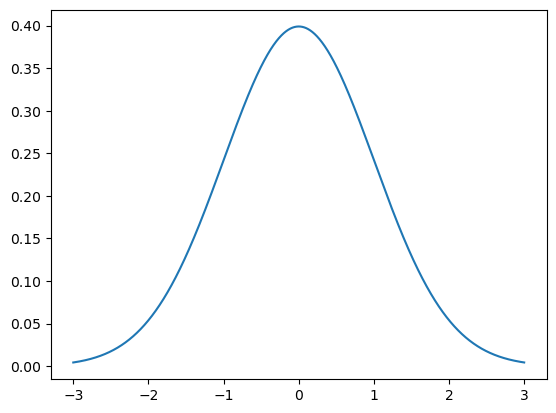

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

x = np.arange(-3, 3, 0.001)
plt.plot(x, norm.pdf(x, loc=0, scale=1));

ShapiroResult(statistic=0.9641679525375366, pvalue=0.00806005671620369)
ShapiroResult(statistic=0.9907558560371399, pvalue=0.725540041923523)
Variances:  1.325822290088294 1.0951114546415335
Ratio <=4:  1.2106733834888797 True
Ttest_indResult(statistic=-0.0639055093498643, pvalue=0.9491099357137442)


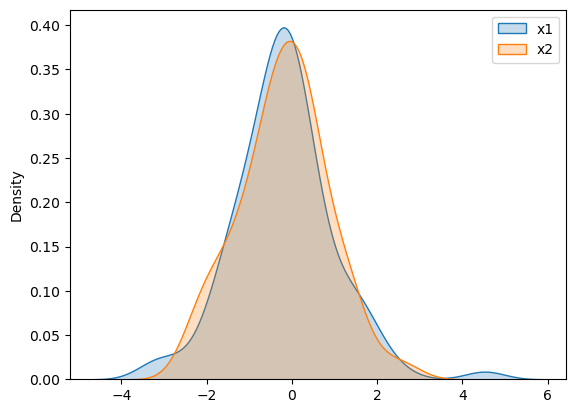

In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import shapiro 
from scipy import stats

# generate data
s = 100
mu = 0
std = 1
x1 = sorted(np.random.normal(loc=0, scale=1, size=s))
x2 = sorted(np.random.normal(loc=mu, scale=std, size=s))

# normal data
print(shapiro(x1))
print(shapiro(x2))

# check variance
print('Variances: ', np.var(x1), np.var(x2))

ratio = max([np.var(x1), np.var(x2)]) / min([np.var(x1), np.var(x2)])
eqvar = bool(ratio <= 4)
print('Ratio <=4: ', ratio, eqvar)

# test of means
print(stats.ttest_ind(x1, x2, equal_var=eqvar))

fig, ax = plt.subplots()
sns.kdeplot(x1, label='x1', fill=True, ax=ax)
sns.kdeplot(x2, label='x2', fill=True, ax=ax)
plt.legend()
plt.show()

### Some Categories of Tests

Parametric tests (has assumptions about the distribution such as mean and standard deviation)
- z-test
- t-test
- ANOVA: Used when there are more than two means (technically 2+ means)

Non-parametric tests (does not assume anything about the distribution)
- Chi-square
- Mann-Whitney U-test
- Kruskel-Wallis H-test: tests the null hypothesis that the population median of all of the groups are equal. It is a non-parametric version of ANOVA.

## Hypothesis Testing

* Null and Alternative Hypothesis
* Null hypothesis: Mean 1 = Mean 2
* Alternate hypothesis: Mean 1 $\ne$ Mean 2

#### Two-Sample Hypothesis Testing 

* Two-Tailed Test
* For a two tailed null hypothesis we see the symbol $=$
* For a two tailed alt hypothesis we see the symbol $\ne$
* For a one tailed null hypothesis we see $\leq$ or $\geq$
* For a one tailed alt hypothesis we see $<$ or $>$

### Our Hypothesis

Is the mean of sample 1 different from the mean of sample 2? In business, AB testing is driven by success. Academics will document differences that may not be important to business.

Please review https://www.statisticshowto.com/probability-and-statistics/hypothesis-testing/one-tailed-test-or-two/

- For a one tailed null hypothesis we see $\leq$ or $\geq$
- For a one tailed alt hypothesis we see $<$ or $>$
- For a two tailed null hypothesis we see the symbol $=$
- For a two tailed alt hypothesis we see the symbol $\ne$

**For a One Tailed Test**
- Null Hypothesis – There is no significant difference between the means of groups
- Alternate Hypothesis – There is a significant difference between the means of groups in that the mean of the group is less or greater than some x

**For a Two Tailed Test**
- Null Hypothesis – There is no significant difference between the means of groups
- Alternate Hypothesis – There is a significant difference between the means of groups either greater than x or less than x

For example, 

**For a One Tailed Test**
- a null hypothesis might be $\bar{x}_1 \geq \bar{x}_2$,
- and the alt hypothesis would be $\bar{x}_1 < \bar{x}_2$

**For a Two Tailed Test**
- a null hypothesis might be $\bar{x}_1 = \bar{x}_2$,
- and the alt hypothesis would be $\bar{x}_1 \ne \bar{x}_2$

Remember, we never accept the null hypothesis, we either reject it or fail to reject it. 

### Confidence Level

$\mu \pm margin error$

where the margin of error is a statistic expressing the amount of random sampling error in the results of a survey. The larger the margin of error, the less confidence one should have that a poll result would reflect the result of a census of the entire population.

https://en.wikipedia.org/wiki/Margin_of_error

### Confidence Intervals

Confidence intervals are used to express how likely $\bar{x}$ falls within a range of values. If the hypothesized value falls in the tail outside of the one-directional area of interest, we reject the null hypothesis. If our hypothesized value falls outside of the two-tailed interval, we reject the null hypothesis.

In frequentist statistics, a confidence interval (CI) is a range of estimates for an unknown parameter. A confidence interval is computed at a designated confidence level. The 95% level is most common, but other levels (such as 90% or 99%) are sometimes used. The confidence level represents the long-run proportion of correspondingly computed intervals that end up containing the true value of the parameter. For example, out of all confidence intervals computed at the 95% level, 95% of them should contain the parameter's true value.

https://en.wikipedia.org/wiki/Confidence_interval

### One Sided

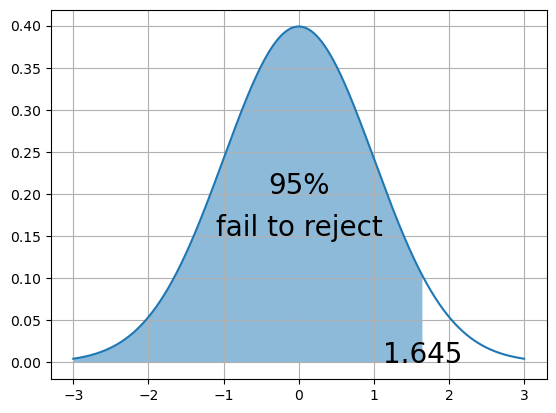

In [4]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

x = np.arange(-3, 3, 0.001)

pdf = stats.norm.pdf(x,loc=0,scale=1)
plt.plot(x, pdf)

z = 1.645 # 95% CI
uci = z

plt.fill_between(x, pdf, where=(x < uci), alpha=0.5)
plt.text(uci, 0, uci, ha='center', fontsize=20)
plt.text(-0.4, .2, f'95%', fontsize=20)
plt.text(-1.1, .15, f'fail to reject', fontsize=20)
plt.grid(True)

Note: A null hypothesis is either true or false. Unfortunately, we do not know which is the case, and we almost never will. It is important to realize that there is no probability that the null hypothesis is true or that it is false, because there is no element of chance.

http://strata.uga.edu/8370/lecturenotes/errors.html#:~:text=A%20null%20hypothesis%20is%20either,is%20no%20element%20of%20chance.

### Two Sided

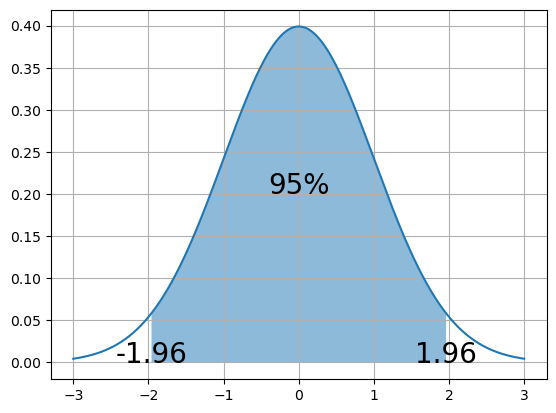

In [5]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

x = np.arange(-3, 3, 0.001)

pdf = stats.norm.pdf(x,loc=0,scale=1)
plt.plot(x, pdf)

z = 1.96 # 95% CI
lci = -z
uci = z

plt.fill_between(x, pdf, where=(lci < x) & (x < uci), alpha=0.5)
plt.text(lci, 0, lci, ha='center', fontsize=20)
plt.text(uci, 0, uci, ha='center', fontsize=20)
plt.text(-0.4, .2, f'95%', fontsize=20)
plt.grid(True)

### Alpha (Significance Levels)

The significance level or alpha level is the probability of making the wrong decision when the null hypothesis is true. Alpha levels (sometimes just called “significance levels”) are used in hypothesis tests. Usually, these tests are run with an alpha level of .05 (5%), but other levels commonly used are .01 and .10.

https://www.statisticshowto.com/probability-and-statistics/statistics-definitions/what-is-an-alpha-level/

Stephanie Glen. "Alpha Level (Significance Level): What is it?" From StatisticsHowTo.com: Elementary Statistics for the rest of us! https://www.statisticshowto.com/probability-and-statistics/statistics-definitions/what-is-an-alpha-level/

### One Sided

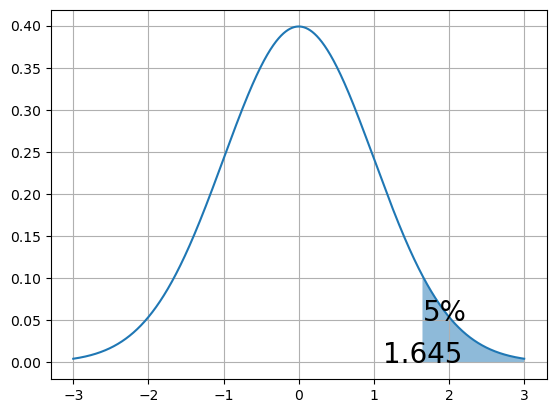

In [6]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

x = np.arange(-3, 3, 0.001)

pdf = stats.norm.pdf(x,loc=0,scale=1)
plt.plot(x, pdf)

z = 1.645 # 95% CI
uci = z

plt.fill_between(x, pdf, where=(x > uci), alpha=0.5)
plt.text(uci, 0, uci, ha='center', fontsize=20)
plt.text(uci, .05, f'5%', fontsize=20)
plt.grid(True)

### Two Sided

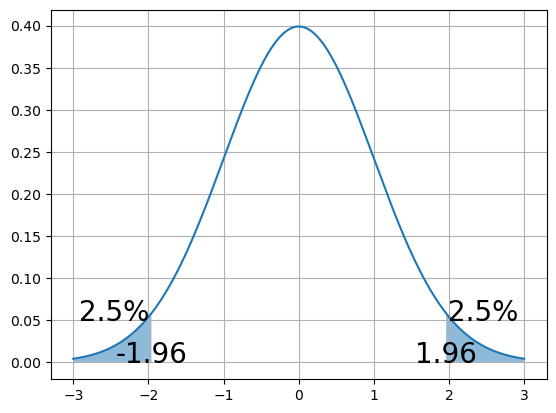

In [7]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

x = np.arange(-3, 3, 0.001)

pdf = stats.norm.pdf(x,loc=0,scale=1)
plt.plot(x, pdf)

z = 1.96 # 95% CI
lci = -z
uci = z

plt.fill_between(x, pdf, where=(lci > x) | (x > uci), alpha=0.5)
plt.text(lci, 0, lci, ha='center', fontsize=20)
plt.text(uci, 0, uci, ha='center', fontsize=20)
# plt.text(-0.4, .2, f'95%', fontsize=20)
plt.text(lci-.5, 0.05, f'2.5%', ha='center', fontsize=20)
plt.text(uci+.5, 0.05, f'2.5%', ha='center', fontsize=20)
plt.grid(True)

### Test Statistic vs Critical Value

In order to make a decision whether to reject the null hypothesis a test statistic is calculated. The decision is made on the basis of the numerical value of the test statistic. There are two approaches how to derive at that decision: The critical value approach and the p-value approach.

https://www.geo.fu-berlin.de/en/v/soga/Basics-of-statistics/Hypothesis-Tests/Introduction-to-Hypothesis-Testing/Critical-Value-and-the-p-Value-Approach/index.html

Critical value example:

* 1.96

### P-Value

For a p value test:
* Get the test statistic
* Use it to determine the p-value
* Compare the p-value to the level of significance
* If the p-value is low the null must go! Reject $H_0$
* If the p-value is high the null must fly! Fail to reject $H_0$

"The p value is the evidence against a null hypothesis. The smaller the p-value, the stronger the evidence that you should reject the null hypothesis."

Stephanie Glen. "P-Value in Statistical Hypothesis Tests: What is it?" From StatisticsHowTo.com: Elementary Statistics for the rest of us! https://www.statisticshowto.com/probability-and-statistics/statistics-definitions/p-value/

The lower the p value, the more predictive the feature is in principle. When we run tests, we are often concerned with the alpha level to help us reject or fail to reject the null hypothesis. The alpha level is (1 - our confidence interval), so if we wanted to have a confidence level of 95% we would use a alpha value of 5%. If our p value is less than the alpha value then the evidence points to rejecting the null hypothesis. If our p values is less than the alpha value then we can say our results are statistcally significant. We found something that is probably not the result of chance. But beware.

In [8]:
import numpy as np
import random

class1 = [random.randint(90, 100) for i in range(10)]
class2 = [random.randint(83, 93) for i in range(10)]

print('Is the difference in means statistically different?', np.mean(class1) - np.mean(class2))

print(stats.ttest_ind(class1, class2))

Is the difference in means statistically different? 6.299999999999997
Ttest_indResult(statistic=5.634891303299467, pvalue=2.400725144743252e-05)


In [9]:
import numpy as np

class1 = [random.randint(90, 100) for i in range(10)]
class2 = [random.randint(91, 101) for i in range(10)]

print('Is the difference in means statistically different?', np.mean(class1) - np.mean(class2))

print(stats.ttest_ind(class1, class2))

Is the difference in means statistically different? -1.5
Ttest_indResult(statistic=-1.0510691307008664, pvalue=0.3071339225258808)


### Type I and Type II Errors

- Hypothesis testing is used against results that are already known
- Type I error: Reject null hypothesis that should have been supported
- $H_0$: There is no fire. Pull the fire alarm, when there is no fire
- Type II error: Fail to reject a null hypothesis that should have been rejected
- $H_0$: There is no fire. Failed to pull the fire alarm, when there is a fire

https://economics.stackexchange.com/questions/27677/type-i-error-type-ii-error-pregnancy-test-analogy-is-it-legit

### P Value vs Alpha

Alpha, the significance level, is the probability that you will make the mistake of rejecting the null hypothesis when in fact it is true. The p-value measures the probability of getting a more extreme value than the one you got from the experiment. If the p-value is greater than alpha, we fail to reject the null hypothesis.

https://www.spcforexcel.com/knowledge/basic-statistics/interpretation-alpha-and-p-value

### Misuse of P-Value

"The general definition of a P value may help one to understand why statistical tests tell us much less than what many think they do: Not only does a P value not tell us whether the hypothesis targeted for testing is true or not; it says nothing specifically related to that hypothesis unless we can be completely assured that every other assumption used for its computation is correct—an assurance that is lacking in far too many studies."

Greenland, S., Senn, S. J., Rothman, K. J., Carlin, J. B., Poole, C., Goodman, S. N., & Altman, D. G. (2016). Statistical tests, P values, confidence intervals, and power: a guide to misinterpretations. European journal of epidemiology, 31(4), 337–350. https://doi.org/10.1007/s10654-016-0149-3

* P-Hacking

Data dredging (also known as data snooping or p-hacking) is the misuse of data analysis to find patterns in data that can be presented as statistically significant, thus dramatically increasing and understating the risk of false positives. This is done by performing many statistical tests on the data and only reporting those that come back with significant results.

https://en.wikipedia.org/wiki/Data_dredging

The following list clarifies some issues that are commonly misunderstood regarding p-values:

* The p-value is not the probability that the null hypothesis is true, or the probability that the alternative hypothesis is false. A p-value can indicate the degree of compatibility between a dataset and a particular hypothetical explanation (such as a null hypothesis). Specifically, the p-value can be taken as the prior probability of obtaining an effect that is at least as extreme as the observed effect, given that the null hypothesis is true. This should not be confused with the posterior probability that the null hypothesis is true given the observed effect (see prosecutor's fallacy). In fact, frequentist statistics does not attach probabilities to hypotheses.
* The p-value is not the probability that the observed effects were produced by random chance alone. The p-value is computed under the assumption that a certain model, usually the null hypothesis, is true. This means that the p-value is a statement about the relation of the data to that hypothesis.
* The 0.05 significance level is merely a convention. The 0.05 significance level (alpha level) is often used as the boundary between a statistically significant and a statistically non-significant p-value. However, this does not imply that there is generally a scientific reason to consider results on opposite sides of any threshold as qualitatively different.
* The p-value does not indicate the size or importance of the observed effect. A small p-value can be observed for an effect that is not meaningful or important. In fact, the larger the sample size, the smaller the minimum effect needed to produce a statistically significant p-value (see effect size). Visualizing effect sizes is a critical component of a data-analysis method called estimation statistics.

https://en.wikipedia.org/wiki/Misuse_of_p-values

READ THIS: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5738950/

### Statistical Power (Sensitivity)

https://www.statisticshowto.com/wp-content/uploads/2015/04/statistical-power.png

Beta is directly related to the power of a test. Power relates to how likely a test is to distinguish an actual effect from one you could expect to happen by chance alone. Beta plus the power of a test is always equal to 1. Usually, researchers will refer to the power of a test (e.g. a power of .8), leaving the beta level (.2 in this case) as implied.

https://www.statisticshowto.com/beta-level/

The statistical power of a binary hypothesis test is the probability that the test correctly rejects the null hypothesis $H_{0}$ when a specific alternative hypothesis $H_{a}$ is true. It is commonly denoted by $1-\beta$ , and represents the chances of a "true positive" detection conditional on the actual existence of an effect to detect. Statistical power ranges from 0 to 1, and as the power of a test increases, the probability $\beta$  of making a type II error by wrongly failing to reject the null hypothesis decreases.

https://en.wikipedia.org/wiki/Power_of_a_test

## AB Terms

### Overall Evaluation Criteria (OEC)

An Overall Evaluation Criterion (OEC) is a (usually composite) quantitative measure of the experiment's objective. Other names include Response or Dependent Variable, Outcome Variable, Evaluation metric, Performance metric.

https://www.analytics-toolkit.com/glossary/overall-evaluation-criterion/

### Gaurdrail Metrics

Business metrics designed to indirectly measure business value and provide alerts about any potentially misleading or erroneous results and analysis.

https://www.split.io/glossary/guardrail-metrics/

### Randomization Unit

A who or what randomly assigned to a group.

https://ianwhitestone.work/choosing-randomization-unit/

### Data Leakage (Interference)

The behavior of the control group is influenced by the treatment given to the test group.

https://towardsdatascience.com/25-a-b-testing-concepts-interview-cheat-sheet-c998a501f911

### SUTVA Assumptions

The Stable Unit Treatment Value Assumption (SUTVA) is a key assumption that is usually made in causal inference. Reference 1 gives a clear definition of SUTVA, which points out that SUTVA is really two assumptions rolled into one:

* The potential outcomes for any unit do not vary with the treatments assigned to other units.
* For each unit, there are no different forms or versions of each treatment level, which lead to different potential outcomes.

https://statisticaloddsandends.wordpress.com/2021/06/08/what-is-the-stable-unit-treatment-value-assumption-sutva/

### Practical, or Substantive, Significance

The fact that an estimated regression coefficient is “statistically significant” (i.e., you can reject the null hypothesis that the true β is 0 with a high level of confidence) does not mean that your independent variable is substantively important.

### Minimum Detectable Effect

Minimum Detectable Effect = Practical Significance Level

Minimum detectable effect (MDE) is a calculation that estimates the smallest improvement you are willing to be able to detect. It determines how "sensitive" an experiment is. Use MDE to estimate how long an experiment will take given the following:

* Baseline conversion rate
* Statistical significance
* Traffic allocation

https://support.optimizely.com/hc/en-us/articles/4410288881293-Use-minimum-detectable-effect-MDE-when-designing-an-experiment

Minimum effect is a business decision more than anything else, not really a data scientist decision. At work, it will typically be a product manager decision. After all, for that you need to take into account things like engineering costs, time, and opportunity-cost of not using those resources to run other tests. And that requires a comprehensive company vision which is typical of product managers, or VP/Director of product in smaller companies.

https://productds.com/wp-content/uploads/Sample_size.html

### Effect Size

In statistics, an effect size is a value measuring the strength of the relationship between two variables in a population, or a sample-based estimate of that quantity. It can refer to the value of a statistic calculated from a sample of data, the value of a parameter for a hypothetical population, or to the equation that operationalizes how statistics or parameters lead to the effect size value.

https://en.wikipedia.org/wiki/Effect_size

https://www.simplypsychology.org/effect-size.html

### Sample Size

How long should we run the experiment? How many customers do we need?

Requires:

* MDE
* Power
* Significance

https://www.evanmiller.org/ab-testing/sample-size.html

In [10]:
# power analysis
import statsmodels.stats.api as sms

effect_size = sms.proportion_effectsize(0.20, 0.22) # baseline = .20, MDE = 2%
print(f'Effect Size: {effect_size.round(4)}')

size = sms.NormalIndPower().solve_power(
    effect_size, 
    power=0.8, 
    alpha=0.05, 
    ratio=1
    )
                
print(f'Sample Size: {round(size)}')

Effect Size: -0.0491
Sample Size: 6507


### Pooled Variance

Pooled variance (also called combined, composite, or overall variance) is a way to estimate common variance when you believe that different populations have the same variances.

https://www.statisticshowto.com/pooled-variance/

Stephanie Glen. "Pooled Variance" From StatisticsHowTo.com: Elementary Statistics for the rest of us! https://www.statisticshowto.com/pooled-variance/

The standard error of a sample is another name for the standard deviation of a sample (it tells you how spread out your data is from some the mean). A pooled standard error accounts for two sample variances and assumes that both of the variances from the two samples are equal. It’s called a “pooled” standard error because you’re pooling the data from both samples into one. There’s a slight difference between standard deviation and pooled sample standard error:

* When we are talking about a population, we talk about standard deviations.
* When we talk about a sample we call it a standard error.

https://www.statisticshowto.com/find-pooled-sample-standard-error/

Stephanie Glen. "Pooled Sample Standard Error: How to Calculate it" From StatisticsHowTo.com: Elementary Statistics for the rest of us! https://www.statisticshowto.com/find-pooled-sample-standard-error/

**More Reading**

* https://sphweb.bumc.bu.edu/otlt/mph-modules/bs/bs704_confidence_intervals/bs704_confidence_intervals5.html
* https://statisticsbyjim.com/hypothesis-testing/confidence-intervals-compare-means/

## Metrics

### Discrete Metrics (Binomial Metrics)

Only two values are possible (0 or 1)

* Click-Through-Rate: Does a user click after seeing something
* Conversion Rate: Does a user become a customer after seeing something
* Click-Through-Probability: The probability a user clicks on the next step [3]
* Bounce Rate: Percentage of people that land on your page and then leave [4]

[1][2]

### Continuous Metrics

* Average Revenue Per User
* Average Session Duration
* Average Order Value

[1]

### Binomial Distribution

Successes and Fails

Formula:<br />
$P(x: n,p) = \binom {n}{x} p^x (1 - p)^{(n-x)}$

* n trials
* x successes

According to StatisticsHowTo (2022):

> A binomial distribution can be thought of as simply the probability of a SUCCESS or FAILURE outcome in an experiment or survey that is repeated multiple times. The binomial is a type of distribution that has two possible outcomes (the prefix “bi” means two, or twice). For example, a coin toss has only two possible outcomes: heads or tails and taking a test could have two possible outcomes: pass or fail.

https://www.statisticshowto.com/probability-and-statistics/binomial-theorem/binomial-distribution-formula/

Stephanie Glen. "Binomial Distribution: Formula, What it is, How to use it" From StatisticsHowTo.com: Elementary Statistics for the rest of us! https://www.statisticshowto.com/probability-and-statistics/binomial-theorem/binomial-distribution-formula/

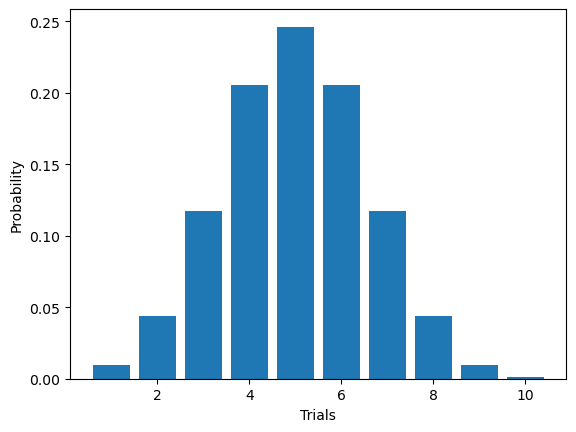

In [11]:
# binomial distribution
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
# binom.pmf(x, n, p, loc)

n = 10
p = 0.5
trials = list(range(1, n + 1))
probs = [stats.binom.pmf(x, n, p) for x in trials]

plt.bar(trials, probs)
plt.xlabel('Trials')
plt.ylabel('Probability')
plt.show()

In [12]:
# define success - getting heads; A fair coins is flipped 10 times. What is the probability of getting 5 heads?
from scipy import stats

stats.binom.pmf(5, 10, .5)

0.24609375000000003

### Normal Distribution

Compare the formula for the normal distribution as shown below

$
\frac{1}{\sqrt{2\pi\sigma^2}}\large{e^\frac{-(x-\mu)^2}{2\sigma^2}}
$

with the python code below

1/(np.sqrt(2 * np.pi * sigma&ast;&ast;2)) * np.exp( - (x - mu)&ast;&ast;2 / (2 * sigma&ast;&ast;2))

Let's break the code down:
* x = our set of numbers 
* mu = mean
* sigma&ast;&ast;2 (sigma squared) = variance of x (sigma = std)
* exp = exponential
* 1 is our numerator
* np.sqrt(2 * np.pi * sigma&ast;&ast;2) = $\sqrt{2\pi\sigma^2}$ NOTE: the two asterisk designate a power such as squared
* np.exp( - (x - mu)&ast;&ast;2 / (2 * sigma&ast;&ast;2)) = $\large{e^\frac{-(x-\mu)^2}{2\sigma^2}}$

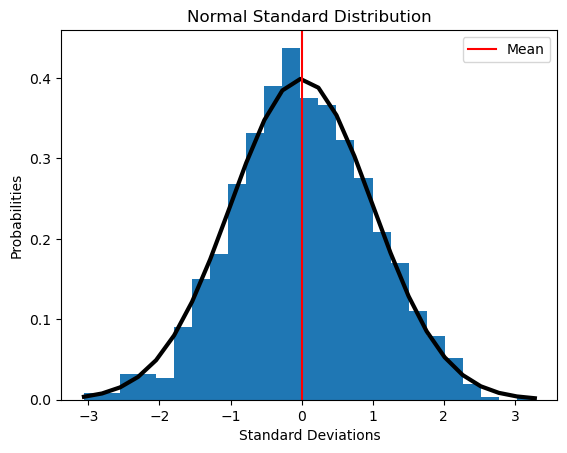

In [13]:
# standard normal distribution with numpy
mu = 0
sigma = 1
x = np.random.normal(0, 1, 1000) 
count, bins, ignored = plt.hist(x, density=True, bins=25)

# plot the distribution curve
plt.plot(bins, 1/(np.sqrt(2 * np.pi * sigma**2)) * np.exp( - (bins - mu)**2 / (2 * sigma**2) ), linewidth=3, color='k')
plt.xlabel('Standard Deviations')
plt.ylabel('Probabilities')
plt.axvline(x=mu, color='red', label='Mean')
plt.title('Normal Standard Distribution')
plt.legend()
plt.show()

### Conversion Rates

* Conversion rate: Conversion rates are calculated by simply taking the number of conversions and dividing that by the number of total ad interactions that can be tracked to a conversion during the same time period. For example, if you had 50 conversions from 1,000 interactions, your conversion rate would be 5%, since 50 ÷ 1,000 = 5%. https://support.google.com/google-ads/answer/2684489?hl=en
* Baseline conversion rate: Current conversion rate represented as a percentage
* A conversion can refer to any desired action that you want the user to take. This can include anything from a click on a button to making a purchase and becoming a customer. Websites and apps often have multiple conversion goals, and each will have its own conversion rate.

https://www.optimizely.com/optimization-glossary/conversion-rate/ 

### One Tail vs Two Tail AB Tests in Terms of CVR

* Both Control and Treatment have equal conversion rates: 
    * null $Control (A) = Treatment (B)$
    * alt $Control (A) \ne Treatment (B)$
* Treatment group's conversion rate is no better than the Control group's and could be worse: 
    * null $Control (A) \geq Treatment (B)$
    * alt $Control (A) \lt Treatment (B)$
* One tail tests look for an improvement in customer experience

https://dominicsando.medium.com/why-two-sided-testing-is-reducing-your-a-b-testing-programs-impact-by-25-11d72276446a

### Lift

Lift indicates if the treatment is better than the control. Lift is a percentage of how the treatment compares to the null hypothesis (control group).

Formula:
* (test - control) / control (* 100)

https://henrykpano.medium.com/a-b-testing-calculating-lift-rate-of-a-test-3d071514deb4

## The Tests

###  The T-Test

A t-test is any statistical hypothesis test in which the test statistic follows a Student's t-distribution under the null hypothesis. It is most commonly applied when the test statistic would follow a normal distribution if the value of a scaling term in the test statistic were known (typically, the scaling term is unknown and therefore a nuisance parameter). When the scaling term is estimated based on the data, the test statistic—under certain conditions—follows a Student's t distribution. The t-test's most common application is to test whether the means of two populations are different.

https://en.wikipedia.org/wiki/Student%27s_t-test

### The Student's t-Statistic (A Test Statistic)

* Developed by William Gosset in 1908 while working at the Guiness brewery but couldn't use his name, his employer preferred staff to use pen names when publishing scientific papers
* Used to determine how far the statistic is from 0 (the mean) in respect to standard errors
* The standard deviation reflects variability within a sample, while the standard error estimates the variability across samples of a population https://www.scribbr.com/statistics/standard-error/
* Standard error of the mean (SEM) measures how far the sample mean (average) of the data is likely to be from the true population mean. The SEM is always smaller than the SD. https://www.investopedia.com/ask/answers/042415/what-difference-between-standard-error-means-and-standard-deviation.asp
* The standard deviation of sample means, is called the standard error. The standard error tells you how accurate the mean of any given sample from that population is likely to be compared to the true population mean. When the standard error increases, i.e. the means are more spread out, it becomes more likely that any given mean is an inaccurate representation of the true population mean. https://s4be.cochrane.org/blog/2018/09/26/a-beginners-guide-to-standard-deviation-and-standard-error/
* Given a t-value and the sample size, software can provide a precise p-value
* For large samples, t-values +- 2 standard errors corresponds to p-value < 0.05

### Standard Error

$se = \frac{\sigma}{\sqrt{n}}$

Confidence Intervals: $\bar{x} \pm z*\frac{\sigma}{\sqrt{n}}$

If the population standard deviation is not known, you can substitute the sample standard deviation, s, in the numerator to approximate the standard error.

https://www.investopedia.com/terms/s/standard-error.asp

The standard error (SE) of a statistic (usually an estimate of a parameter) is the standard deviation of its sampling distribution or an estimate of that standard deviation. If the statistic is the sample mean, it is called the standard error of the mean (SEM). The sampling distribution of a mean is generated by repeated sampling from the same population and recording of the sample means obtained. This forms a distribution of different means, and this distribution has its own mean and variance. Mathematically, the variance of the sampling mean distribution obtained is equal to the variance of the population divided by the sample size. This is because as the sample size increases, sample means cluster more closely around the population mean.

https://en.wikipedia.org/wiki/Standard_error

The standard deviation reflects variability within a sample, while the standard error estimates the variability across samples of a population https://www.scribbr.com/statistics/standard-error/

### t-Test

Note: Standard deviation is the square root of the variance

- When we use z scores with a normal distribution, we have to know the population's standard deviation
- If we don't know the population standard deviation, Student's T-Distribution 
- Student's t-test determines if there is a significant difference between two sets of data
- Can't just compare means due to variance and outliers
- t-test also considers sample variances

### One Sample t Test

- We don't know the population standard deviation
- Tests null hypothesis that population mean is equal to a specified $\mu$ based on a sample mean $\bar{x}$
- $H_0$: Sample mean = Population mean

In statistics, the t-statistic is the ratio of the departure of the estimated value of a parameter from its hypothesized value to its standard error.

https://en.wikipedia.org/wiki/T-statistic

t-statistic formula:
- $t = \frac{\bar{x} - \mu}{s/\sqrt{n}}$

In [14]:
# one sample t test
from scipy import stats

rvs = stats.norm.rvs(loc=0, scale=1, size=(100, 2))
print(stats.ttest_1samp(rvs, popmean=5.0))

Ttest_1sampResult(statistic=array([-47.7739466 , -57.38102075]), pvalue=array([3.49343286e-70, 8.67679942e-78]))


Returns:

* The t-statistic
* The p-value associated with the given alternative

### Independent Two-Sample t-Test

- $H_0$: $\bar{x_1} = \bar{x_2}$
- Are two samples from the class equal?

t-statistic can have:
- equal sample sizes, equal variance
- unequal sample sizes, equal variance
- equal of unequal sample sizes, unequal variance (Welch's t-test)

t = signal/noise = difference in means/sample variability = $\frac{(\bar{x_1} - \bar{x_2})}{\sqrt{\frac{s_1^2}{n_1}+\frac{s_2^2}{n_2}}}$

Compared to a t-score:
- $t$ = t-statistic
- $t_{df, \alpha}$ = t-critical
- df = degrees of freedom 
- General formula for df = n1 + n2 - 2 for equal variance or 
- Also see Welch-Satterthwaite Formula
- $\alpha$ = significance level

In [15]:
# independent t test
from scipy import stats

rvs1 = stats.norm.rvs(loc=5, scale=10, size=500)
rvs2 = stats.norm.rvs(loc=5, scale=10, size=500)
print(stats.ttest_ind(rvs1,rvs2)) # assumes that the populations have identical variances by default

Ttest_indResult(statistic=0.4252153227577922, pvalue=0.670771382029332)


### Shapiro-Wilk

https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6676026/#:~:text=The%20purpose%20of%20the%20t,essential%20in%20the%20t%2Dtest

The Shapiro–Wilk test is a test of normality. It was published in 1965 by Samuel Sanford Shapiro and Martin Wilk.

https://en.wikipedia.org/wiki/Shapiro%E2%80%93Wilk_test

If the p-value of the test is greater than α = .05, then the data is assumed to be normally distributed.

In [16]:
import math
import numpy as np
from scipy.stats import shapiro 

x = np.random.normal(0, 1, 1000) 
shapiro(x)

ShapiroResult(statistic=0.9989466071128845, pvalue=0.844393789768219)

### Kolmogorov-Smirnov Test

In statistics, the Kolmogorov–Smirnov test (K–S test or KS test) is a nonparametric test of the equality of continuous (or discontinuous), one-dimensional probability distributions that can be used to compare a sample with a reference probability distribution (one-sample K–S test), or to compare two samples (two-sample K–S test). In essence, the test answers the question "What is the probability that this collection of samples could have been drawn from that probability distribution?" or, in the second case, "**What is the probability that these two sets of samples were drawn from the same (but unknown) probability distribution?**". It is named after Andrey Kolmogorov and Nikolai Smirnov.

Tests for normality.

[5]

### A/A Testing

* Split the users into two groups and give them both the treatment
* The idea here is to validate the test setup by seeing that you get roughly the same performance from each variant. You’re testing the same thing against itself, to see if there’s noise in the data, instead of signal

https://cxl.com/blog/aa-testing-waste-time/

In [17]:
# A/A test 
import numpy as np
import random
from scipy import stats

population = np.random.normal(loc = 0, scale = 1, size = 30)
p_values = []

for i in range(10000):
    g1 = []
    g2 = []
    for j in population:
        rnd_num = random.random()
        g2.append(j) if rnd_num <= 0.5 else g1.append(j)
        
    result = stats.ttest_ind(g1, g2)
    p_values.append(result.pvalue)
    
stats.kstest(p_values, 'uniform')

KstestResult(statistic=0.006799363651958434, pvalue=0.7416167712837736)

### Sample Ratio Mismatch Using Chi-Square

Are group sizes significantly different from expected values?

[6]

In [18]:
import numpy as np
from scipy.stats import chisquare

g1 = 4000
g2 = 4150
expv = np.mean([g1, g2])
chisquare([g1, g2], f_exp=[expv, expv])

Power_divergenceResult(statistic=2.7607361963190185, pvalue=0.0966037727627497)

### Fisher's Exact Test

Although in practice it is employed when sample sizes are small, it is valid for all sample sizes. It is named after its inventor, Ronald Fisher, and is one of a class of exact tests, so called because the significance of the deviation from a null hypothesis (e.g., P-value) can be calculated exactly, rather than relying on an approximation that becomes exact in the limit as the sample size grows to infinity, as with many statistical tests. [7]

Fisher's exact test is a statistical test used to **determine if there are nonrandom associations between two categorical variables**.

https://mathworld.wolfram.com/FishersExactTest.html#:~:text=Fisher's%20exact%20test%20is%20a,of%20observations%20in%20which%20and%20.

In [19]:
import numpy as np
import pandas as pd
from scipy.stats import hypergeom
from scipy.stats import fisher_exact

np.random.seed(42)

x = np.random.binomial(n=1, p=0.7, size=19)
y = np.random.binomial(n=1, p=0.3, size=21)

_, (a, c) = np.unique(x, return_counts=True)
_, (b, d) = np.unique(y, return_counts=True)

ct = pd.DataFrame(data=[[a, b], [c, d]], index=['stay', 'bounce'], columns=['A', 'B'])

m = ct.values
print('Data')
print(f'x: {x}')
print(f'y: {y}')
print('\nContingency Table')
print(ct)

table = np.array([[m[0, 0], m[0, 1]], [m[1, 0], m[1, 1]]])
_, p = fisher_exact(table, alternative='two-sided')
print(f'\np: {p:.3f}')

Data
x: [1 0 0 1 1 1 1 0 1 0 1 0 0 1 1 1 1 1 1]
y: [0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0]

Contingency Table
         A   B
stay     6  17
bounce  13   4

p: 0.003


### Pearson's Chi-Squared Test

A statistical test applied to sets of categorical data to evaluate how likely it is that any observed difference between the sets arose by chance.

https://en.wikipedia.org/wiki/Pearson%27s_chi-squared_test

In [20]:
# https://towardsdatascience.com/chi-square-test-with-python-d8ba98117626
import pandas as pd
import scipy.stats as stats

# create sample data according to survey
data = [['18-29', 'Republican'] for i in range(141)] + \
        [['18-29', 'Democrat'] for i in range(68)] + \
        [['18-29', 'Other'] for i in range(4)] + \
        [['30-44', 'Republican'] for i in range(179)] + \
        [['30-44', 'Democrat'] for i in range(159)] + \
        [['30-44', 'Other'] for i in range(7)] + \
        [['45-65', 'Republican'] for i in range(220)] + \
        [['45-65', 'Democrat'] for i in range(216)] + \
        [['45-65', 'Other'] for i in range(4)] + \
        [['65 & older', 'Republican'] for i in range(101)] + \
        [['65 & older', 'Democrat'] for i in range(86)] + \
        [['65 & older', 'Other'] for i in range(4)]
df = pd.DataFrame(data, columns = ['Age Group', 'Political Affiliation']) 

# create contingency table
data_crosstab = pd.crosstab(df['Age Group'],
                            df['Political Affiliation'],
                           margins=True, margins_name="Total")

# significance level
alpha = 0.05

# Calcualtion of Chisquare
chi_square = 0
rows = df['Age Group'].unique()
columns = df['Political Affiliation'].unique()
for i in columns:
    for j in rows:
        O = data_crosstab[i][j]
        E = data_crosstab[i]['Total'] * data_crosstab['Total'][j] / data_crosstab['Total']['Total']
        chi_square += (O-E)**2/E

print(data_crosstab)
print()

# The p-value approach
print("Approach 1: The p-value approach to hypothesis testing in the decision rule")
p_value = 1 - stats.chi2.cdf(chi_square, (len(rows)-1)*(len(columns)-1))
conclusion = "Failed to reject the null hypothesis."
if p_value <= alpha:
    conclusion = "Null Hypothesis is rejected."
        
print("chisquare-score is:", chi_square, " and p value is:", p_value)
print(conclusion)
    
# The critical value approach
print("--------------------------------------------------------------------------------------")
print("Approach 2: The critical value approach to hypothesis testing in the decision rule")
critical_value = stats.chi2.ppf(1-alpha, (len(rows)-1)*(len(columns)-1))
conclusion = "Failed to reject the null hypothesis."
if chi_square > critical_value:
    conclusion = "Null Hypothesis is rejected."
        
print("chisquare-score is:", chi_square, " and critical value is:", critical_value)
print(conclusion)

Political Affiliation  Democrat  Other  Republican  Total
Age Group                                                
18-29                        68      4         141    213
30-44                       159      7         179    345
45-65                       216      4         220    440
65 & older                   86      4         101    191
Total                       529     19         641   1189

Approach 1: The p-value approach to hypothesis testing in the decision rule
chisquare-score is: 19.481729605501187  and p value is: 0.0034228899561198345
Null Hypothesis is rejected.
--------------------------------------------------------------------------------------
Approach 2: The critical value approach to hypothesis testing in the decision rule
chisquare-score is: 19.481729605501187  and critical value is: 12.591587243743977
Null Hypothesis is rejected.


### Z-Test

* Observations are normally distributed or the sample is large
* Variances are known
* $t = \frac{\bar{x}_1 - \bar{x}_2}{\sqrt{\frac{{s^2_1}}{n_1} + \frac{{s^2_2}}{n_2}}}$
* https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html

Before we perform the test, we need to decide if we’ll assume the two populations have equal variances or not. As a rule of thumb, we can assume the populations have equal variances if the ratio of the larger sample variance to the smaller sample variance is less than 4:1... The ratio of the larger sample variance to the smaller sample variance is 12.26 / 7.73 = 1.586, which is less than 4. This means we can assume that the population variances are equal. [8]

[1][8]

In [21]:
from scipy import stats

g1 = np.random.normal(0, 1, 37) 
g2 = np.random.normal(0, 1, 42) 

variances = [np.var(g1), np.var(g2)]

print(stats.levene(g1, g2)) # p > 0.05 signifies eq var
print(f'4:1 ratio: {max(variances) / min(variances)}')

# zval = (g1.mean() - g2.mean()) / np.sqrt(np.var(g1)/len(x) + np.var(g2)/len(y))
# print(zval)
# print((stats.norm.cdf(zval) * 2).round(3)) # * 2 for two tailed assignment 5
# print((stats.norm.sf(abs(zval)) * 2).round(3)) # assignment 8
print(stats.ttest_ind(g1, g2, equal_var=True, alternative='two-sided'))

LeveneResult(statistic=0.10171036138963314, pvalue=0.7506502410783215)
4:1 ratio: 1.1435038598268332
Ttest_indResult(statistic=-0.11253381760304303, pvalue=0.910693020615128)


### Levene Test

Levene's test ( Levene 1960) is used to test if **k samples have equal variances**. Equal variances across samples is called homogeneity of variance. Some statistical tests, for example the analysis of variance, assume that variances are equal across groups or samples. The Levene test can be used to verify that assumption.

https://www.itl.nist.gov/div898/handbook/eda/section3/eda35a.htm

### Student's T-Test Two Sided

* The observations are normally distributed or the sample size is large
* The sampling distributions have similar variances, $\sigma^2_x \approx \sigma^2_y$

[1]

In [22]:
from scipy import stats

g1 = np.random.normal(0, 1, 17) 
g2 = np.random.normal(0, 1, 14) 

variances = [np.var(g1), np.var(g2)]

print(stats.levene(g1, g2)) # p > 0.05 signifies eq var
print(f'4:1 ratio: {max(variances) / min(variances)}')

print(stats.ttest_ind(g1, g2, equal_var=True, alternative='two-sided'))

LeveneResult(statistic=0.1975584620228295, pvalue=0.6599983245710374)
4:1 ratio: 1.4183288079511378
Ttest_indResult(statistic=1.030952472472328, pvalue=0.3110850809924013)


### Welch's T-Test

* Variance's are not similar so we can't use pooled variance
* Welch's t-test **removes assumption of similar variances**
* t statistic is slightly different with different number of degrees of freedom - $\nu$

[1]

In [23]:
from scipy import stats

g1 = np.random.normal(0, 1, 78) 
g2 = np.random.normal(50, 3, 102) 

variances = [np.var(g1), np.var(g2)]

print(stats.levene(g1, g2)) # p > 0.05 signifies eq var
print(f'4:1 ratio: {max(variances) / min(variances)}')

print(stats.ttest_ind(g1, g2, equal_var=False, alternative='two-sided'))

LeveneResult(statistic=57.813200094086724, pvalue=1.596138781192925e-12)
4:1 ratio: 9.798707655597791
Ttest_indResult(statistic=-158.35895168479274, pvalue=1.1775863203818505e-147)


### Mann-Whitney U Test 

In statistics, the Mann–Whitney U test (also called the Mann–Whitney–Wilcoxon (MWW/MWU), Wilcoxon rank-sum test, or Wilcoxon–Mann–Whitney test) is a nonparametric test of the null hypothesis that, for randomly selected values X and Y from two populations, the probability of X being greater than Y is equal to the probability of Y being greater than X. [9]

A measure of the central tendencies of the two groups (means or medians; since the Mann–Whitney U test is an ordinal test, medians are usually recommended)

https://en.wikipedia.org/wiki/Mann%E2%80%93Whitney_U_test

In [24]:
from scipy.stats import mannwhitneyu

mwu = mannwhitneyu(x, y, use_continuity=False, alternative='two-sided')
print(f'Mann-Whitney U Test: u - {mwu.statistic:.3f}, p - {mwu.pvalue:.3f}')

Mann-Whitney U Test: u - 298.000, p - 0.002


### Data Distribution vs Stats Distribution

* Tests that rely on the assumption of normally distributed test statistics can also be applied if the original sampling distribution is highly non-normal
* The distribution of the test statistic is asymptotically normal as the sample size increases (central limit theorem)
* This is very useful in the common case of A/B tests that produce observations that are zero-inflated and/or multimodal

If we have enough samples, tests derived under normality assumptions like Z-test, Student’s t-test, and Welch’s t-test can still be applied for observations that signficantly deviate from normality. Indeed, thanks to the central limit theorem, the distribution of the test statistics tends to normality as the sample size increases. In the zero-inflated and multimodal example we are considering, even a sample size of 40 produces a distribution that is well approximated by a normal distribution.

[1]

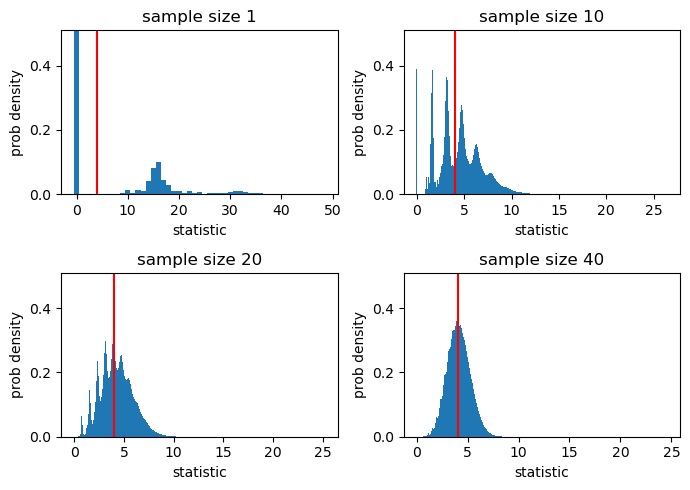

In [25]:
import matplotlib.pyplot as plt

p = np.array([245, 0, 0, 0, 0, 0, 0, 0, 0,  1, 3, 1, 3, 2, 9, 18, 22, 10, 6, 2, 2, 1, 2, 1, 1])
a = np.arange(len(p))
p = p / p.sum()
loc = (p*np.arange(len(p))).sum()
nn = [1, 10, 20, 40]
f, axx = plt.subplots(2, 2, figsize=(7, 5))

for i, n in enumerate(nn):
    r, c = divmod(i, 2)
    x = p
    ax = axx[r, c]
    for _ in range(n):
        x = np.convolve(x, p)
        
    ax.bar(np.arange(len(x))/n, x*n, width=1/n)
    ax.set_ylim([0, 0.51])
    ax.vlines(loc, 0, 0.51, 'r')
    ax.set_xlabel('statistic')
    ax.set_ylabel('prob density')
    ax.set_title(f'sample size {n}')
    
f.tight_layout();

## Scenario

We have a web page with a learn more button. We know that there is 13% conversion rate when new visitors click on the learn more button. The web team has designed a new page with a new look for the `Learn More` button in hopes of a 2% conversion rate increase. You've been asked to run an A/B test.

* Control group uses old page
* Treatment group uses new page
* Groups are independent
* Conversion is dependent
* $H_0$: base conversion rate = new conversion rate (the conversion rate of visitors to the old site)
* $H_a$: base conversion rate $\neq$ new conversion rate (the conversion rate of visitors to the new site)
* Two tailed even though we have base conversion rate because we are comparing groups and want to control for other variables so that we can attribute any differences to the design

Readings:

* https://www.statsmodels.org/devel/generated/statsmodels.stats.proportion.proportions_ztest.html
* https://www.statsmodels.org/dev/generated/statsmodels.stats.proportion.proportion_confint.html

[10]

In [36]:
# get the sample size
import statsmodels.stats.api as sms
from math import ceil

effect_size = sms.proportion_effectsize(0.13, 0.15) # p hacking?
# effect_size = sms.proportion_effectsize(0.116, 0.136)
sample_size = sms.NormalIndPower().solve_power(
    effect_size, # minimum detectable effect
    power=0.8, 
    alpha=0.05, 
    ratio=1
    )

sample_size = int(sample_size)
print('MDE: ', effect_size)
print('Sample Size: ', sample_size)

MDE:  -0.0576728617308947
Sample Size:  4719


In [27]:
# https://www.kaggle.com/datasets/zhangluyuan/ab-testing?select=ab_data.csv
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/gitmystuff/Datasets/main/ab_data.csv')
print(df.shape)
print(df.head())

(294478, 5)
   user_id                   timestamp      group landing_page  converted
0   851104  2017-01-21 22:11:48.556739    control     old_page          0
1   804228  2017-01-12 08:01:45.159739    control     old_page          0
2   661590  2017-01-11 16:55:06.154213  treatment     new_page          0
3   853541  2017-01-08 18:28:03.143765  treatment     new_page          0
4   864975  2017-01-21 01:52:26.210827    control     old_page          1


In [28]:
# delete repeat users
session_counts = df['user_id'].value_counts(ascending=False)
repeat_users = session_counts[session_counts > 1].count()
print(f'Repeat users: {repeat_users}')

users_to_drop = session_counts[session_counts > 1].index
df = df[~df['user_id'].isin(users_to_drop)]
df.shape

Repeat users: 3894


(286690, 5)

In [29]:
# sample database
control_sample = df[df['group'] == 'control'].sample(n=sample_size, random_state=42)
treatment_sample = df[df['group'] == 'treatment'].sample(n=sample_size, random_state=42)

ab_test = pd.concat([control_sample, treatment_sample], axis=0)
ab_test.reset_index(drop=True, inplace=True)

print(ab_test.head())
print(ab_test['group'].value_counts())

   user_id                   timestamp    group landing_page  converted
0   663037  2017-01-05 02:13:38.063443  control     old_page          0
1   932826  2017-01-13 04:50:06.941679  control     old_page          1
2   922999  2017-01-04 07:19:23.813317  control     old_page          0
3   857826  2017-01-19 02:27:37.678241  control     old_page          0
4   762926  2017-01-18 17:50:59.261406  control     old_page          0
control      4719
treatment    4719
Name: group, dtype: int64


In [30]:
control_sample.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4719 entries, 293433 to 68819
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   user_id       4719 non-null   int64 
 1   timestamp     4719 non-null   object
 2   group         4719 non-null   object
 3   landing_page  4719 non-null   object
 4   converted     4719 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 221.2+ KB


In [31]:
# conversion rates
import numpy as np
import scipy.stats as stats

conversion_rates = ab_test.groupby('group')['converted']
std_p = lambda x: np.std(x, ddof=0) # standard deviation
se_p = lambda x: stats.sem(x, ddof=0) # standard error

conversion_rates = conversion_rates.agg([np.mean, std_p, se_p])
conversion_rates.columns = ['conversion_rate', 'std_deviation', 'std_error']
conversion_rates.style.format('{:.3f}')

,conversion_rate,std_deviation,std_error
group,,,
control,0.115,0.320,0.005
treatment,0.129,0.335,0.005


### Test of Proportions

$z = \frac{\hat{p} - p}{\sqrt{\frac{p (1 - p)}{n}}}$

In [32]:
# test of proportions; never use t
from scipy import stats
from statsmodels.stats.proportion import proportions_ztest, proportion_confint

control_group = ab_test[ab_test['group'] == 'control']['converted']
treatment_group = ab_test[ab_test['group'] == 'treatment']['converted']
n_con = control_group.count()
n_treat = treatment_group.count()
successes = [control_group.sum(), treatment_group.sum()]
n_obs = [n_con, n_treat]

_, pval = proportions_ztest(successes, nobs=n_obs)
(lower_con, lower_treat), (upper_con, upper_treat) = proportion_confint(successes, nobs=n_obs, alpha=0.05)

print(f'p: {pval:.3f}')
print(f'control group ci (95%): [{lower_con:.3f} - {upper_con:.3f}]')
print(f'treatment group ci (95%): [{lower_treat:.3f} - {upper_treat:.3f}]')

p: 0.044
control group ci (95%): [0.106 - 0.125]
treatment group ci (95%): [0.119 - 0.139]


### Using the t-Test

In [33]:
# don't know population; always use t
from scipy import stats

stats.ttest_ind(control_group, treatment_group)

Ttest_indResult(statistic=-2.0111480870601284, pvalue=0.0443382027496869)

### Conclusions

* p-value (0.044) < $\alpha$ (0.05)
* our treatment ci upper bound is only 0.139, short of the desired 0.15
* statistically significant but not practically significant
* the new design did not work

## References

1. https://towardsdatascience.com/a-b-testing-a-complete-guide-to-statistical-testing-e3f1db140499
2. https://classroom.udacity.com/courses/ud257/lessons/456f424d-0cbc-481c-a0ab-a6217013f46e/concepts/d87d2932-962d-4c1d-9fdb-c5ac754783b7 
3. https://www.dataquest.io/blog/a-b-testing-the-definitive-guide-to-improving-your-product/
4. https://en.wikipedia.org/wiki/Bounce_rate
5. https://en.wikipedia.org/wiki/Kolmogorov%E2%80%93Smirnov_test
6. https://www.analytics-toolkit.com/glossary/sample-ratio-mismatch/
7. https://en.wikipedia.org/wiki/Fisher's_exact_test
8. https://www.statology.org/two-sample-t-test-python/
9. https://en.wikipedia.org/wiki/Mann%E2%80%93Whitney_U_test
10. https://towardsdatascience.com/ab-testing-with-python-e5964dd66143

### Don't Use T-Tests for AB Testing Article

* https://towardsdatascience.com/dont-use-a-t-test-for-a-b-testing-e4d2ef7ab9b6